<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LDA-계산식" data-toc-modified-id="LDA-계산식-1">LDA 계산식</a></span></li><li><span><a href="#LDA-pseudo-code" data-toc-modified-id="LDA-pseudo-code-2">LDA pseudo code</a></span></li><li><span><a href="#LDA-Exam" data-toc-modified-id="LDA-Exam-3">LDA Exam</a></span><ul class="toc-item"><li><span><a href="#뉴스기사-lexicon-가져오기" data-toc-modified-id="뉴스기사-lexicon-가져오기-3.1">뉴스기사 lexicon 가져오기</a></span></li></ul></li></ul></div>

### LDA 계산식

![lda1](./images/LDA1.png)

### LDA pseudo code

![lda2](./images/LDA2.png)

### LDA Exam

In [1]:
from collections import defaultdict

In [2]:
from random import randrange, seed, random

In [5]:
import pickle

In [9]:
import numpy as np

#### 뉴스기사 lexicon 가져오기

In [31]:
with open("naver_news/pickle/extended_nouns.pickle", "rb") as f:    # 명사 만으로 된 뉴스기사 Lexicon : {filename: lexicon, ...}
    news_collection = pickle.load(f)

In [36]:
collection = list()
docs = list()
for f, l in news_collection:
    docs.append(f)
    collection.append(l)

In [37]:
collection = np.array(collection)

In [34]:
documents = defaultdict(lambda: defaultdict(int))    # DTM  (collection을 DTM 형태의 dictionary로 변환한 것)
vocabulary = list()

for i, d in enumerate(collection):
    # i : 문서 index,  d: i번째 문서 내 단어 목록
    for term in d:
        documents[i][term.lower()] += 1
        vocabulary.append(term.lower())
        
vocabulary = list(set(vocabulary))

In [54]:
a = 0.1
b = 0.1

K = 6   # 전체 토픽 수

M = len(documents)
V = len(vocabulary)    # l, v

# 특정 Topic에 몇개의 단어가 있는지 => 분모 부분
topicTermCount = defaultdict(int)

# 문서에 상관없이 특정 단어의 토픽 할당 횟수 =>
docTopicDistribution = defaultdict(lambda: defaultdict(int))
# [document][0번째토픽:몇개의 단어, 1번째토픽: 몇개의 단어, ...]

# 특정 문서의 단어에 상관 없이 토픽 할당 횟수 =>
topicTermDistribution = defaultdict(lambda: defaultdict(int))
# [topic][Vocaburaty0:몇번, ..., n:몇번 ]

# Z_m1 = m번째 문서 1번째 단어의 Topic
# M개의 문서만큼 => N개의 단어 => Topic
termTopicAssignmentMatrix = defaultdict(lambda: defaultdict(int))
# z[document][term] = Topic
# n(i, (j, r)) = i번째 토픽의 횟수, j번째 문서의 r번째 단어

In [55]:
seed(0)

for i, termList in enumerate(collection):
    for j, term in enumerate(termList):
        token = term.lower()
        topic = randrange(K)
        
        topicTermCount[topic] += 1
        docTopicDistribution[i][topic] += 1
        topicTermDistribution[topic][term] += 1
        
        termTopicAssignmentMatrix[i][j] = topic

In [56]:
topicTermCount

defaultdict(int, {3: 28336, 0: 28524, 2: 28725, 4: 28370, 1: 28764, 5: 28336})

In [42]:
# termTopicAssignmentMatrix

In [44]:
# docTopicDistribution

In [46]:
# topicTermDistribution

In [50]:
def collepsedGibbsSampling(i, term):
    sampling = list()
    for k in range(K):
        # k번째 토픽에 대한 확률
        sampling.append(likelihoodAlpha(i, k) * likelihoodBeta(k, term))
        
    threshold = sum(sampling) * random()    # 0~1 사이의 값 (sample 들 중에서 위치 선택) => 적당한 k번째를 고르기 위한 샘플링
    
    for topicNo, topicProbability in enumerate(sampling):
        threshold -= topicProbability
        
        if threshold <= 0.0:
            return topicNo
        
#     # print(sampling)
#     return termTopicAssignmentMatrix[i][term]

In [48]:
def likelihoodAlpha(i, k):    # 문서, 토픽
    return docTopicDistribution[i][k] + a

In [49]:
def likelihoodBeta(k, term):    # 토픽, term
    return (topicTermDistribution[k][term] + b) / (topicTermCount[k] + (b * V))

In [57]:
iterationNumber = 100

for _ in range(iterationNumber):
    for i, termList in enumerate(collection):
        for j, term in enumerate(termList):
            # m을 고정해야 되고, l을 고정해야 함 => topicTermAssignment
            # 공식에 m, l이 여기서는 i, j로 변경됨
            topic = termTopicAssignmentMatrix[i][j]

            topicTermCount[topic] -= 1
            docTopicDistribution[i][topic] -= 1
            topicTermDistribution[topic][term] -= 1
            
            topic = collepsedGibbsSampling(i, term)
            
            topicTermCount[topic] += 1
            docTopicDistribution[i][topic] += 1
            topicTermDistribution[topic][term] += 1
            
            termTopicAssignmentMatrix[i][j] = topic
#             break
#         break
#     break
    print(_, end=" ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [58]:
# docTopicDistribution

In [63]:
# topicTermDistribution

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fontPath = "Libray/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=fontPath, background_color="white")

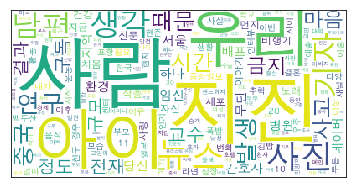

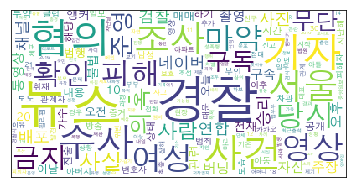

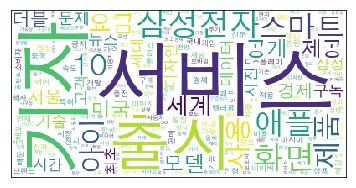

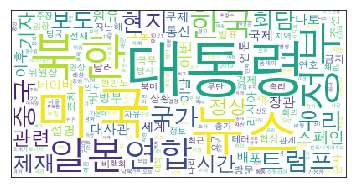

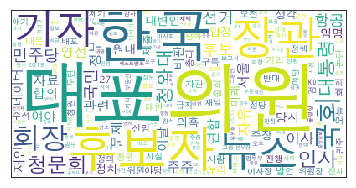

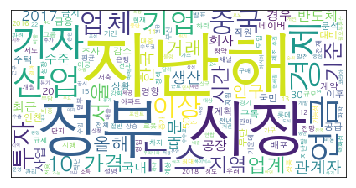

In [69]:
for topic, term_freq in topicTermDistribution.items():
    wc.generate_from_frequencies(term_freq)
    plt.imshow(wc)
    plt.xticks([])
    plt.yticks([])
    plt.show()

['교수', '금지', '기자', '남편', '뉴스', '때문', '마음', '발생', '사고', '사람', '사진', '생각', '시간', '아이', '연구', '우리', '전재', '정도', '중국', '지진']


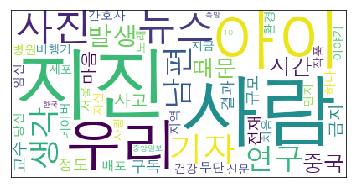

['경찰', '구독', '금지', '기자', '뉴스', '당시', '마약', '무단', '사건', '사실', '서울', '수사', '여성', '영상', '의혹', '조사', '준영', '피해', '혐의', '확인']


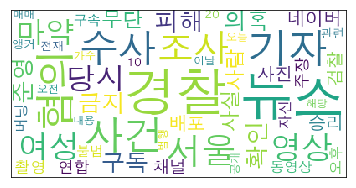

['10', '경제', '공개', '기자', '더블', '모델', '미국', '사용', '삼성전자', '서비스', '서울', '세계', '스마트', '아이', '애플', '요금', '제공', '제품', '출시', '화면']


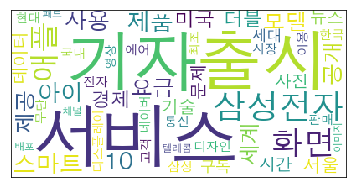

['관련', '국가', '기자', '뉴스', '대통령', '미국', '보도', '북한', '시간', '연합', '우리', '일본', '정부', '정상', '제재', '중국', '트럼프', '한국', '현지', '회담']


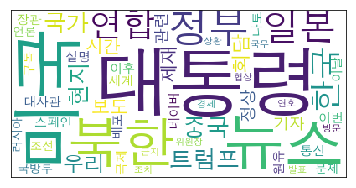

['국민', '국회', '기자', '뉴스', '대통령', '대표', '민주당', '선거', '의원', '이사', '인사', '자유', '장관', '청문회', '청와대', '한국', '항공', '회장', '후보', '후보자']


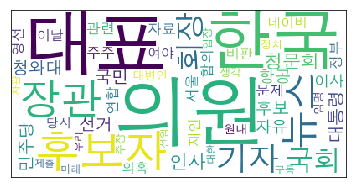

['10', '가격', '경제', '기업', '기자', '기준', '뉴스', '산업', '서울', '시간', '시장', '업계', '업체', '연금', '이상', '정부', '중국', '지난해', '지역', '투자']


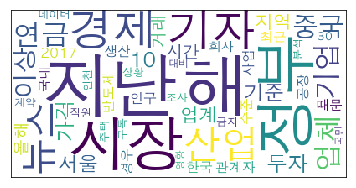

In [90]:
for topic, term_freq in topicTermDistribution.items():
    print(sorted(sorted(term_freq, key=term_freq.get, reverse=True)[:20]))      # [word]
    cluster = dict(sorted(term_freq.items(), key=lambda x: x[1], reverse=True)[:50])    # {word, value}
    wc.generate_from_frequencies(cluster)
    plt.imshow(wc)
    plt.xticks([])
    plt.yticks([])
    plt.show()